In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile(r"C:\Users\Lenovo\Downloads\archive (4).zip") as f:
    f.extractall(r"C:\Users\Lenovo\Downloads")

In [5]:
car_data = pd.read_csv(r"C:\Users\Lenovo\Downloads\cardekho_data.csv")

In [6]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
car_data.shape

(301, 9)

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Preprocessing

In [10]:
df = car_data.copy()

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
from datetime import datetime

In [13]:
current_date = datetime.now()

In [14]:
current_date.year

2024

In [15]:
df["age_of_vehicle"] = current_date.year - df["Year"] 

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [17]:
# df.drop(columns = ["Year"],inplace =True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car_Name        301 non-null    object 
 1   Year            301 non-null    int64  
 2   Selling_Price   301 non-null    float64
 3   Present_Price   301 non-null    float64
 4   Kms_Driven      301 non-null    int64  
 5   Fuel_Type       301 non-null    object 
 6   Seller_Type     301 non-null    object 
 7   Transmission    301 non-null    object 
 8   Owner           301 non-null    int64  
 9   age_of_vehicle  301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [19]:
df.isnull().sum()

Car_Name          0
Year              0
Selling_Price     0
Present_Price     0
Kms_Driven        0
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
age_of_vehicle    0
dtype: int64

In [20]:
df["Selling_Price"] = df["Selling_Price"].fillna(df["Selling_Price"].mean())

In [21]:
df.duplicated().sum()

2

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_vehicle
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478,10.384615
std,2.896868,4.984240,8.567887,39015.170352,0.248720,2.896868
min,2003.000000,0.100000,0.320000,500.000000,0.000000,6.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000,8.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000,12.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,21.000000


In [25]:
class Preprocess:
    
    def __init__(self,data):
        self.__data = data
        
    def Percentage_missin_val(self):
        """
        this method use to see percentage of missing values
        """
        try:
            print(self.__data.isnull().sum()/self.__data.shape[0]*100)
            
        except Exception as e:
            print(f"Error = {e}")

    def sep_categorical_n_num(self):
        """
        this method use to seperate categorical and numerical variables
        """
        try:
            self.cat_var = [i for i in self.__data.columns if self.__data[i].dtype == "O"]
            self.num_var = [j for j in self.__data.columns if self.__data[j].dtype != "O"]
            
            return (self.cat_var, self.num_var)
            
        except Exception as e:
            print(f"Error = {e}")
        

    def datatype_conv(self,Float = "float16",Int = "int16"):
        """
        This method convert data type of a column and reduce size of 
        data
        """
        try:
            for i in self.__data.columns:
                if self.__data[i].dtype == "O":
                    self.__data[i] = self.__data[i].astype("category")
                elif self.__data[i].dtype == "int64":
                    self.__data[i] = self.__data[i].astype(Int)
                elif self.__data[i].dtype == "float64":
                    self.__data[i] = self.__data[i].astype(Float)
            return self.__data
        
        except Exception as e:
            print(f"Error = {e}")
                

In [26]:
prep = Preprocess(df)

In [27]:
cat_var,num_var = prep.sep_categorical_n_num()

In [28]:
cat_var

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [29]:
num_var

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'age_of_vehicle']

In [30]:
prep.datatype_conv(Int='int32')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
0,ritz,2014,3.349609,5.589844,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.750000,9.539062,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.250000,9.851562,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.849609,4.148438,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.601562,6.871094,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.500000,11.601562,33988,Diesel,Dealer,Manual,0,8
297,brio,2015,4.000000,5.898438,60000,Petrol,Dealer,Manual,0,9
298,city,2009,3.349609,11.000000,87934,Petrol,Dealer,Manual,0,15
299,city,2017,11.500000,12.500000,9000,Diesel,Dealer,Manual,0,7


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Car_Name        299 non-null    category
 1   Year            299 non-null    int32   
 2   Selling_Price   299 non-null    float16 
 3   Present_Price   299 non-null    float16 
 4   Kms_Driven      299 non-null    int32   
 5   Fuel_Type       299 non-null    category
 6   Seller_Type     299 non-null    category
 7   Transmission    299 non-null    category
 8   Owner           299 non-null    int32   
 9   age_of_vehicle  299 non-null    int32   
dtypes: category(4), float16(2), int32(4)
memory usage: 12.5 KB


In [32]:
def get_value_counts(data,cat_vars,min_len = 20):
    try:
        for i in data[cat_vars]:
            if len(data[i].value_counts())<min_len:
                print("column:- ",i)
                print(data[i].value_counts())
                print("*"*70)
                
    except Exception as e:
        print(f"Error = {e}")

In [33]:
cat_var

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [34]:
get_value_counts(df,cat_vars=cat_var,min_len=30)

column:-  Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
**********************************************************************
column:-  Seller_Type
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
**********************************************************************
column:-  Transmission
Manual       260
Automatic     39
Name: Transmission, dtype: int64
**********************************************************************


In [35]:
df.drop(columns = ["Car_Name"],inplace=True)

In [36]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
0,2014,3.349609,5.589844,27000,Petrol,Dealer,Manual,0,10
1,2013,4.750000,9.539062,43000,Diesel,Dealer,Manual,0,11
2,2017,7.250000,9.851562,6900,Petrol,Dealer,Manual,0,7
3,2011,2.849609,4.148438,5200,Petrol,Dealer,Manual,0,13
4,2014,4.601562,6.871094,42450,Diesel,Dealer,Manual,0,10


In [37]:
df["Owner"].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

In [38]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_vehicle
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589844,7.539062,36916.752508,0.043478,10.384615
std,2.896868,4.984375,8.570312,39015.170352,0.248720,2.896868
min,2003.000000,0.099976,0.320068,500.000000,0.000000,6.000000
25%,2012.000000,0.849854,1.200195,15000.000000,0.000000,8.000000
50%,2014.000000,3.509766,6.101562,32000.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.839844,48883.500000,0.000000,12.000000
max,2018.000000,35.000000,92.625000,500000.000000,3.000000,21.000000


In [39]:
df[df["Present_Price"] == 92.625000]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
86,2010,35.0,92.625,78000,Diesel,Dealer,Manual,0,14


In [40]:
df[df["Owner"] > 0]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
58,2014,4.101562,6.800781,39485,Petrol,Dealer,Manual,1,10
85,2006,2.500000,23.734375,142000,Petrol,Individual,Automatic,3,18
106,2014,1.349609,3.449219,16500,Petrol,Individual,Manual,1,10
184,2008,0.250000,0.750000,26000,Petrol,Individual,Manual,1,16
191,2012,0.199951,0.569824,25000,Petrol,Individual,Manual,1,12
192,2007,0.199951,0.750000,49000,Petrol,Individual,Manual,1,17
193,2013,0.199951,0.649902,24000,Petrol,Individual,Manual,1,11
198,2011,0.150024,0.569824,35000,Petrol,Individual,Manual,1,13
201,2010,3.250000,6.789062,58000,Diesel,Dealer,Manual,1,14
205,2016,5.250000,5.699219,3493,Petrol,Dealer,Manual,1,8


In [41]:
df[df["Transmission"] == "Automatic"]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
12,2015,7.500000,9.937500,15000,Petrol,Dealer,Automatic,0,9
22,2011,4.398438,8.007812,50000,Petrol,Dealer,Automatic,0,13
40,2016,5.851562,7.871094,24524,Petrol,Dealer,Automatic,0,8
45,2014,7.500000,12.039062,15000,Petrol,Dealer,Automatic,0,10
49,2017,7.750000,9.289062,37000,Petrol,Dealer,Automatic,0,7
50,2012,14.898438,30.609375,104707,Diesel,Dealer,Automatic,0,12
51,2015,23.000000,30.609375,40000,Diesel,Dealer,Automatic,0,9
52,2017,18.000000,19.765625,15000,Diesel,Dealer,Automatic,0,7
53,2013,16.000000,30.609375,135000,Diesel,Individual,Automatic,0,11
55,2009,3.599609,15.039062,70000,Petrol,Dealer,Automatic,0,15


In [42]:
df[df["age_of_vehicle"] == 21.000000]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
37,2003,0.350098,2.279297,127000,Petrol,Individual,Manual,0,21
39,2003,2.250000,7.980469,62000,Petrol,Dealer,Manual,0,21


In [43]:
Age_less_than_ten = df[df["age_of_vehicle"] < 10]
Age_less_than_ten

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
2,2017,7.250000,9.851562,6900,Petrol,Dealer,Manual,0,7
5,2018,9.250000,9.828125,2071,Diesel,Dealer,Manual,0,6
6,2015,6.750000,8.117188,18796,Petrol,Dealer,Manual,0,9
7,2015,6.500000,8.609375,33429,Diesel,Dealer,Manual,0,9
8,2016,8.750000,8.890625,20273,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
295,2015,8.546875,13.093750,60076,Diesel,Dealer,Manual,0,9
296,2016,9.500000,11.601562,33988,Diesel,Dealer,Manual,0,8
297,2015,4.000000,5.898438,60000,Petrol,Dealer,Manual,0,9
299,2017,11.500000,12.500000,9000,Diesel,Dealer,Manual,0,7


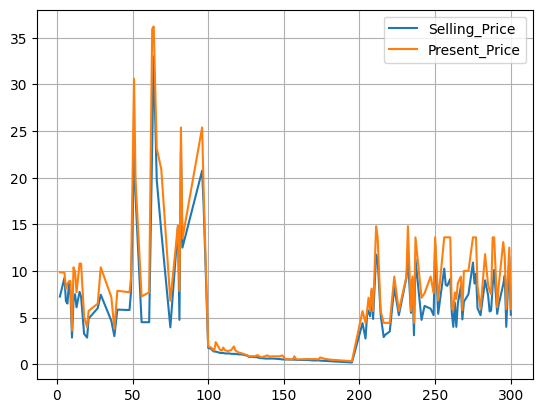

In [44]:
Age_less_than_ten["Selling_Price"].plot(label = "Selling_Price")
Age_less_than_ten["Present_Price"].plot(label = "Present_Price")
plt.legend()
plt.grid()
plt.show()

In [45]:
Age_greter_than_ten = df[df["age_of_vehicle"] > 10]
Age_greter_than_ten

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
1,2013,4.750000,9.539062,43000,Diesel,Dealer,Manual,0,11
3,2011,2.849609,4.148438,5200,Petrol,Dealer,Manual,0,13
14,2009,2.250000,7.210938,77427,Petrol,Dealer,Manual,0,15
19,2010,2.650391,7.980469,41442,Petrol,Dealer,Manual,0,14
22,2011,4.398438,8.007812,50000,Petrol,Dealer,Automatic,0,13
...,...,...,...,...,...,...,...,...,...
273,2010,2.250000,7.500000,61203,Petrol,Dealer,Manual,0,14
281,2006,2.099609,7.601562,50456,Petrol,Dealer,Manual,0,18
284,2013,3.500000,5.898438,9800,Petrol,Dealer,Manual,0,11
293,2010,3.250000,9.898438,38000,Petrol,Dealer,Manual,0,14


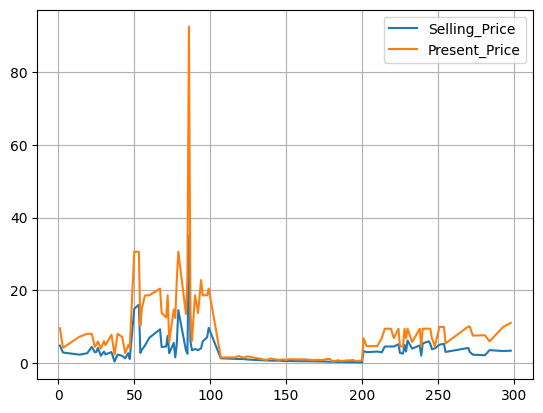

In [46]:
Age_greter_than_ten["Selling_Price"].plot(label = "Selling_Price")
Age_greter_than_ten["Present_Price"].plot(label = "Present_Price")
plt.legend()
plt.grid()
plt.show()

In [47]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_vehicle
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589844,7.539062,36916.752508,0.043478,10.384615
std,2.896868,4.984375,8.570312,39015.170352,0.248720,2.896868
min,2003.000000,0.099976,0.320068,500.000000,0.000000,6.000000
25%,2012.000000,0.849854,1.200195,15000.000000,0.000000,8.000000
50%,2014.000000,3.509766,6.101562,32000.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.839844,48883.500000,0.000000,12.000000
max,2018.000000,35.000000,92.625000,500000.000000,3.000000,21.000000


In [48]:
fueltype = df.groupby("Fuel_Type")

In [49]:
fueltype.agg({
    "Selling_Price":["max","min","mean"],
    "Present_Price":["max","min","mean"],
    "Kms_Driven":["max","min","mean"],
    "age_of_vehicle":["max","min","mean"],
})

Selling_Price                      Present_Price            \
                    max       min       mean           max       min   
Fuel_Type                                                              
CNG                3.25  2.949219   3.099609      7.738281  5.089844   
Diesel            35.00  3.099609  10.102438     92.625000  5.699219   
Petrol            19.75  0.099976   3.264136     23.734375  0.320068   

                     Kms_Driven                      age_of_vehicle      \
                mean        max    min          mean            max min   
Fuel_Type                                                                 
CNG         6.414062      49998  35500  42749.000000             13   9   
Diesel     15.646889     197176   2071  50675.775862             19   6   
Petrol      5.583563     500000    500  33528.937238             21   7   

                      
                mean  
Fuel_Type             
CNG        11.000000  
Diesel     10.051724  
Petrol     10.460251

In [50]:
fueltype.get_group("Diesel")[fueltype.get_group("Diesel")["Transmission"] == "Automatic"]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
50,2012,14.898438,30.609375,104707,Diesel,Dealer,Automatic,0,12
51,2015,23.000000,30.609375,40000,Diesel,Dealer,Automatic,0,9
52,2017,18.000000,19.765625,15000,Diesel,Dealer,Automatic,0,7
53,2013,16.000000,30.609375,135000,Diesel,Individual,Automatic,0,11
59,2014,19.984375,35.968750,41000,Diesel,Dealer,Automatic,0,10
62,2014,18.750000,35.968750,78000,Diesel,Dealer,Automatic,0,10
63,2015,23.500000,35.968750,47000,Diesel,Dealer,Automatic,0,9
64,2017,33.000000,36.218750,6000,Diesel,Dealer,Automatic,0,7
79,2012,14.500000,30.609375,89000,Diesel,Dealer,Automatic,0,12
82,2017,23.000000,25.390625,15000,Diesel,Dealer,Automatic,0,7


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            299 non-null    int32   
 1   Selling_Price   299 non-null    float16 
 2   Present_Price   299 non-null    float16 
 3   Kms_Driven      299 non-null    int32   
 4   Fuel_Type       299 non-null    category
 5   Seller_Type     299 non-null    category
 6   Transmission    299 non-null    category
 7   Owner           299 non-null    int32   
 8   age_of_vehicle  299 non-null    int32   
dtypes: category(3), float16(2), int32(4)
memory usage: 9.4 KB


In [52]:
cat_var.remove("Car_Name")

# EDA

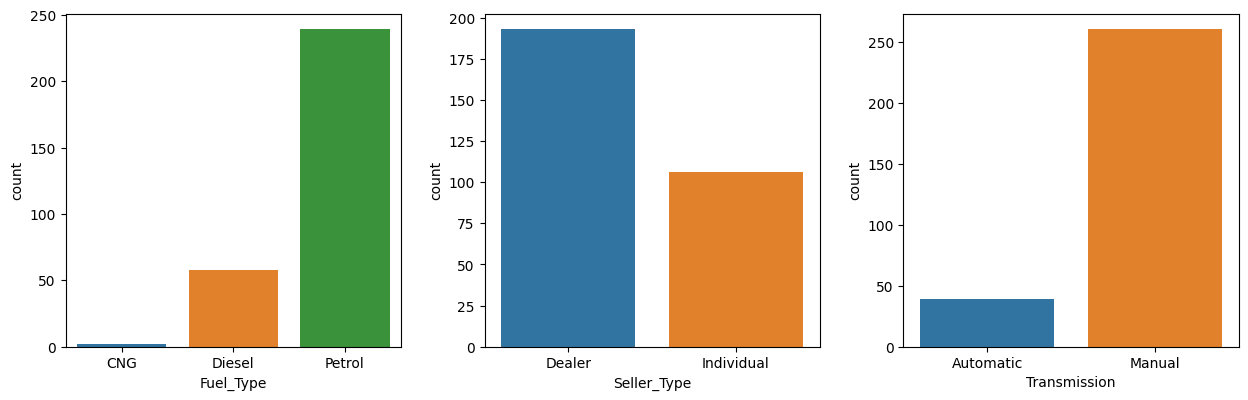

In [53]:
fig = plt.figure(figsize = (80,80))

gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.25,hspace = 0.25)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

axis = [ax0,ax1,ax2]

for ax,col in zip(axis,cat_var):
    
    sn.countplot(ax = ax, data = df,x = col)


In [54]:
num_var

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'age_of_vehicle']

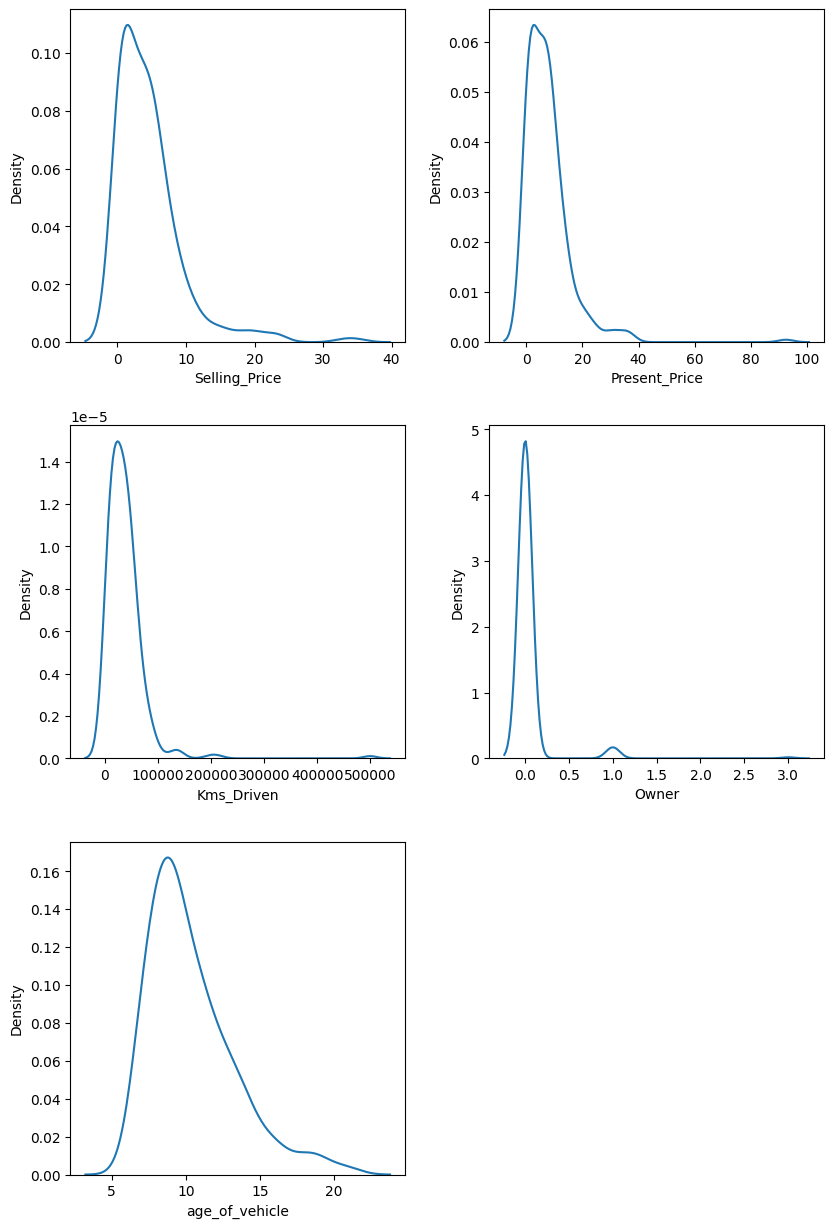

In [55]:
fig = plt.figure(figsize = (80,80))

gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.25,hspace = 0.25)

# ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])


axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(axis,num_var):
    if col != "Year":
        sn.kdeplot(ax = ax, data = df,x = col,)


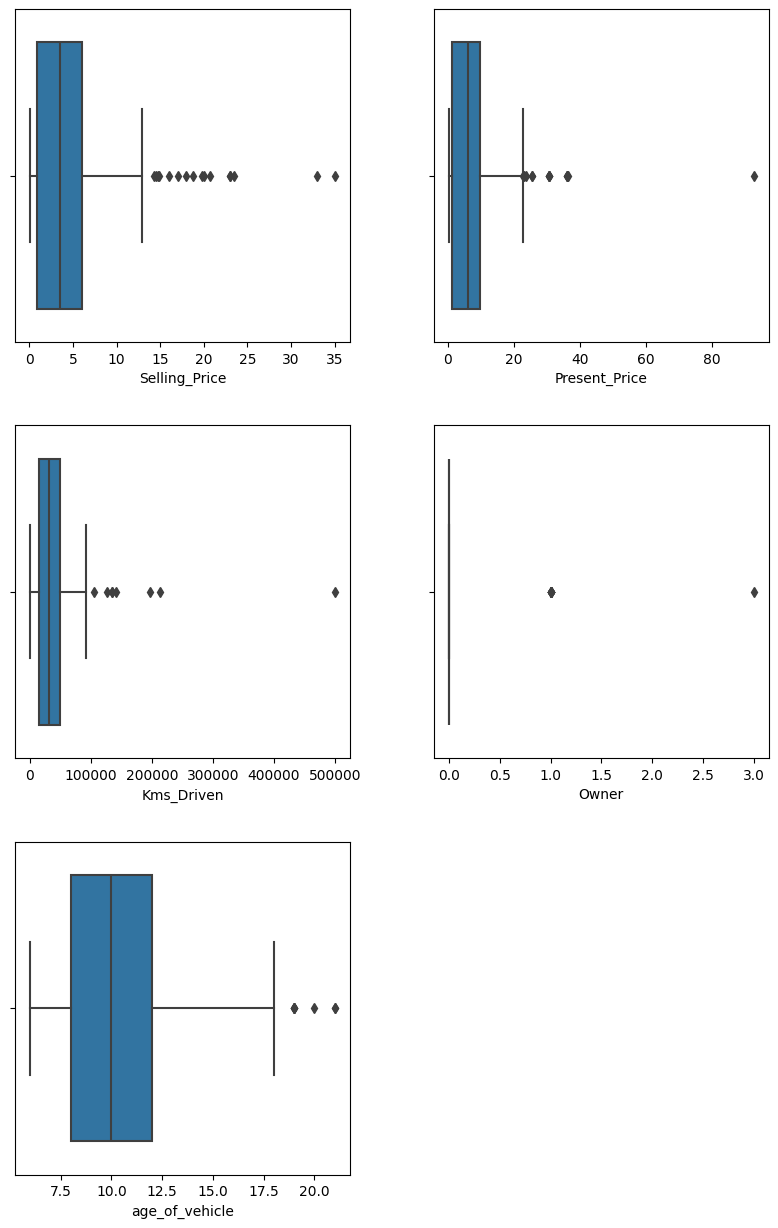

In [56]:
fig = plt.figure(figsize = (80,80))

gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.25,hspace = 0.25)

# ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])


axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(axis,num_var):
    if col != "Year":
        sn.boxplot(ax = ax, data = df,x = col,)


In [57]:
def cap_outliers(data,num_var_list):
    for i in num_var_list:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        UL = Q3 + 1.5 * IQR
        LL = Q1 - 1.5 * IQR
        
        data[i] = np.where(data[i] > UL, UL, np.where(data[i]<LL,LL,data[i]))
    return data

In [58]:
df1 = cap_outliers(data = df,num_var_list=num_var)

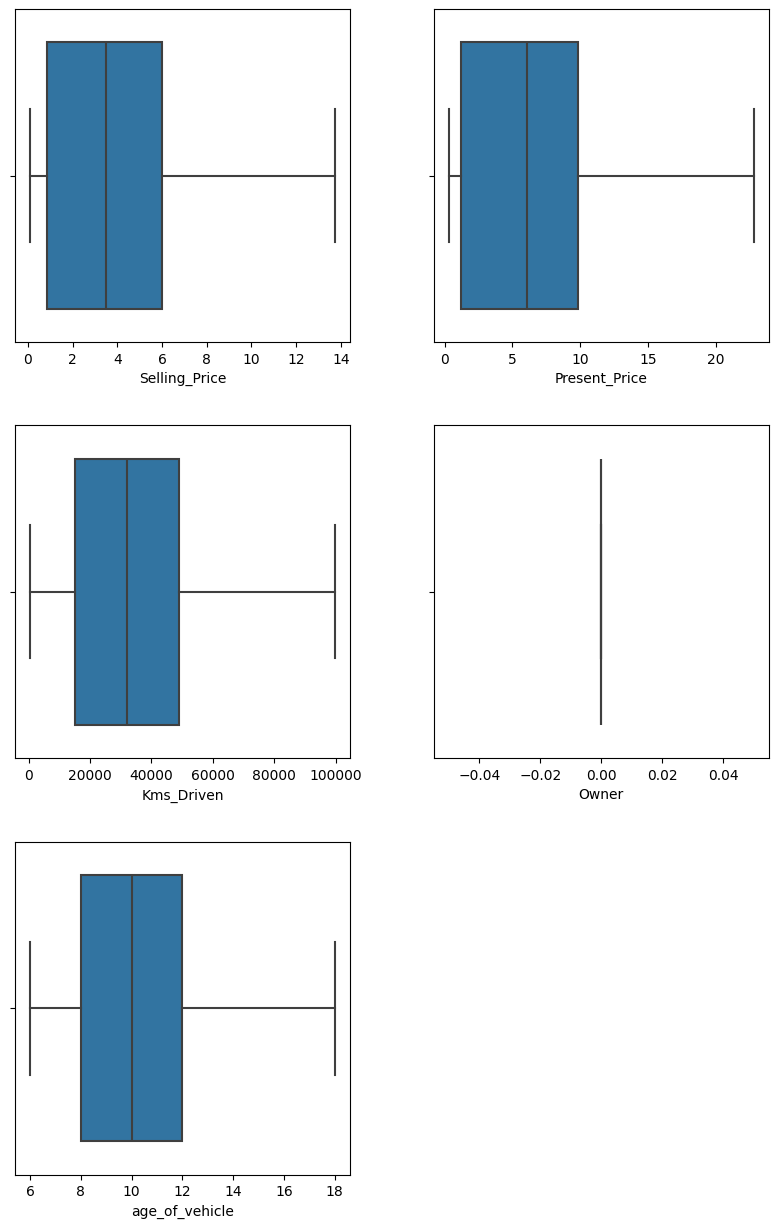

In [59]:
fig = plt.figure(figsize = (80,80))

gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.25,hspace = 0.25)

# ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])


axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(axis,num_var):
    if col != "Year":
        sn.boxplot(ax = ax, data = df1,x = col,)


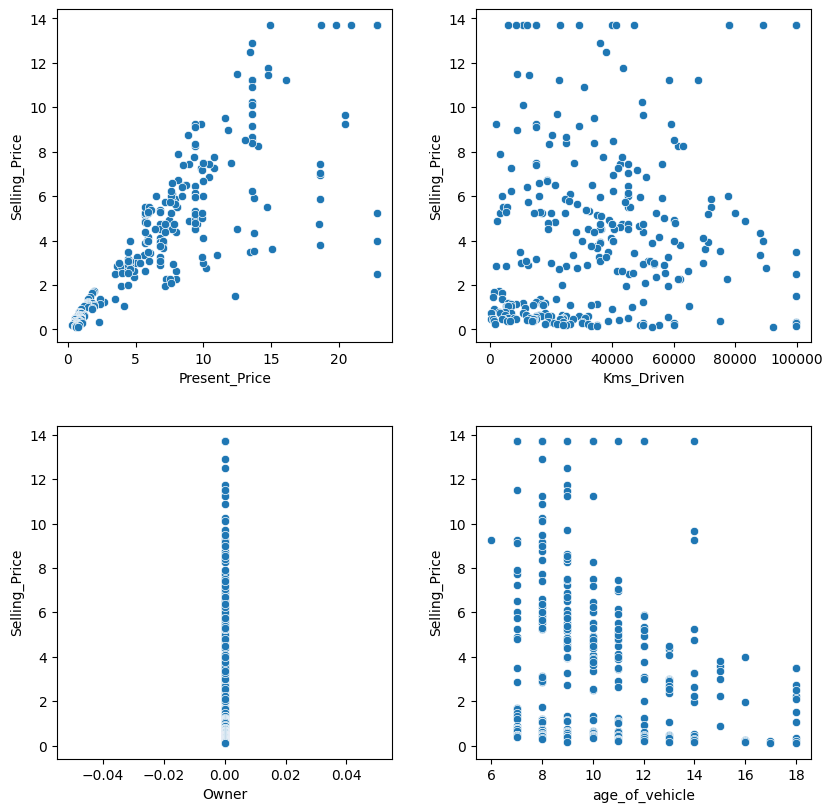

In [60]:
fig = plt.figure(figsize = (80,80))

gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.25,hspace = 0.25)

# ax0 = fig.add_subplot(gs[0,0])
# ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])


axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(axis,num_var):
    if col != "Selling_Price":
        sn.scatterplot(ax = ax, data = df,x = col,y = "Selling_Price")


In [61]:
df1.isnull().sum()

Year              0
Selling_Price     0
Present_Price     0
Kms_Driven        0
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
age_of_vehicle    0
dtype: int64

# Feature Engineering

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split

In [63]:
X = df1.drop(columns = ["Selling_Price","Year"])
y = df1["Selling_Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 7)
(90, 7)
(209,)
(90,)


In [64]:
y_test.isnull().sum()

0

In [65]:
X_train.head(2)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_vehicle
226,5.699219,24678.0,Petrol,Dealer,Manual,0.0,9.0
69,20.906250,12000.0,Petrol,Dealer,Manual,0.0,8.0


In [66]:
from sklearn.impute import KNNImputer,SimpleImputer

In [67]:
X_train.isnull().sum()

Present_Price     0
Kms_Driven        0
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
age_of_vehicle    0
dtype: int64

In [68]:
X_train = X_train.dropna()

In [69]:
tfm1 = ColumnTransformer(transformers = [
    ("Fuel_Type",OneHotEncoder(drop="first"),[2]),
    ("Seller_Type",OneHotEncoder(drop="first"),[3]),
    ("Transmission",OneHotEncoder(drop="first"),[4]),
],remainder = "passthrough")

In [70]:
tfm2 = ColumnTransformer(transformers = [
    ("Present_Price",StandardScaler(),[3]),
    ("Kms_Driven",StandardScaler(),[4]),
    ("age_of_vehicle",StandardScaler(),[6]),
],remainder = "passthrough")

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [73]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor


In [74]:
ab = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
rf = RandomForestRegressor()

In [75]:
def adj_r2_score(R2_score = 1,n = 0,k = 0):
    """
    This function returns value of adjusted R2 score
    
    Parameters --
    
    R2_score => calculate a value of r2_score
    n = Total no of records
    k = Total no of variables
    """
    res = (1-R2_score)*(n-1)/(n-1-k)
    result = 1 - res
    return result

In [76]:
def Model_training(trfm1,trfm2,X_train_data,y_train_data,
                   X_test_data,y_test_data,**Kargs):
    """
    This function takes column transformers,data and models and returns 
    dataframe of each and every models evaluation metrics. and list of trained 
    model pipelines
    
    parameters --
    
    trfm1 => Column Transformer 1
    trfm2 => Column Transformer 2
    X_train_data => X_train
    y_train_data => y_train
    X_test_data => X_test
    y_test_data => y_test
    **kargs => Model name = model
    """
    try:
        
        metrics_grid = pd.DataFrame()
        list_of_pipelines = []

        for (name,model) in Kargs.items():
            pipe = Pipeline([
                ("trfm1",trfm1),
                ("trfm2",trfm2),
                ("Model",model),
            ])

            pipe.fit(X_train_data,y_train_data)  # Model Fitting
            
            y_pred = pipe.predict(X_test_data)  # Calculation of y_pred
            
            list_of_pipelines.append(pipe)      
            
            R2_score = r2_score(y_test_data,y_pred)
            
            RMSE = np.sqrt(mean_squared_error(y_test_data,y_pred))
            
            Adj_R2_score = adj_r2_score(R2_score,n =X_test_data.shape[0]
                                        ,k = X_test_data.shape[1])
            MAE = mean_absolute_error(y_test_data,y_pred)

            metrics_grid = metrics_grid.append({
                "Model":name,
                "R2_score":R2_score,
                "Adj_R2_score":Adj_R2_score,
                "RMSE":RMSE,
                "MAE":MAE

            },ignore_index=True)

        return metrics_grid , list_of_pipelines
    
    except Exception as e:
        print(f"Error = {e}")
    

In [77]:
metrics_grd, Models = Model_training(tfm1,tfm2,X_train,y_train,X_test,y_test,
               Adda_Boost = ab,Gradient_Boost = gb,Xgboost = xgb,
               Random_Forest = rf)

In [78]:
metrics_grd

,Model,R2_score,Adj_R2_score,RMSE,MAE
0,Adda_Boost,0.848150,0.835188,1.496861,0.844032
1,Gradient_Boost,0.782073,0.763470,1.793205,0.804590
2,Xgboost,0.750315,0.729000,1.919425,0.952871
3,Random_Forest,0.682999,0.655937,2.162745,0.967885


In [79]:
Models[0]

Pipeline(steps=[('trfm1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Fuel_Type',
                                                  OneHotEncoder(drop='first'),
                                                  [2]),
                                                 ('Seller_Type',
                                                  OneHotEncoder(drop='first'),
                                                  [3]),
                                                 ('Transmission',
                                                  OneHotEncoder(drop='first'),
                                                  [4])])),
                ('trfm2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Present_Price',
                                                  StandardScaler(), [3]),
                                                 ('Kms_Driven',
                                                  StandardScaler(), [4]),
                                                 ('age_of_vehicle',
                                                  StandardScaler(), [6])])),
                ('Model', AdaBoostRegressor())])

In [80]:
Models[3]

Pipeline(steps=[('trfm1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Fuel_Type',
                                                  OneHotEncoder(drop='first'),
                                                  [2]),
                                                 ('Seller_Type',
                                                  OneHotEncoder(drop='first'),
                                                  [3]),
                                                 ('Transmission',
                                                  OneHotEncoder(drop='first'),
                                                  [4])])),
                ('trfm2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Present_Price',
                                                  StandardScaler(), [3]),
                                                 ('Kms_Driven',
                                                  StandardScaler(), [4]),
                                                 ('age_of_vehicle',
                                                  StandardScaler(), [6])])),
                ('Model', RandomForestRegressor())])

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {
    
    "n_estimators":[100,200,300,400,500],
    "min_samples_split":range(0,10),
    "max_depth":range(5,20),
}

In [83]:
gs = GridSearchCV(rf,param_grid = param_grid,cv = 10)

In [84]:
gs_pipe = Pipeline([
    ("tfm1",tfm1),
    ("tfm2",tfm2),
    ("gs",gs)
])

In [ ]:
GS_pipe = gs_pipe.fit(X_train,y_train)

In [ ]:
GS_pipe.best_params_

In [ ]:
GS_pipe.best_score_